In [1]:
print("ok")

ok


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class Value:
    def __init__(self,data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data = {self.data})"
a = Value(2.0)
a

Value(data = 2.0)

In [138]:
class Value:
    def __init__(self,data,_children = (),_op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label
        self._backward = lambda: None 
    
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self,other),'+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other),'*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __rmul__(self, other):
        return self * other

    def __truediv__(self,other):
        return self * (other**-1)

    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)

    def __pow__(self, other):
        assert isinstance(other, (int,float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1-t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad 
        out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        self.grad = 1.0
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        for node in reversed(topo):
            node._backward()


In [5]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [6]:
d._op

'+'

In [24]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes,edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format ='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name= uid, label = "{data %.4f}" % (n.data, ), shape= 'record')
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

In [19]:
draw_dot(d)

NameError: name 'draw_dot' is not defined

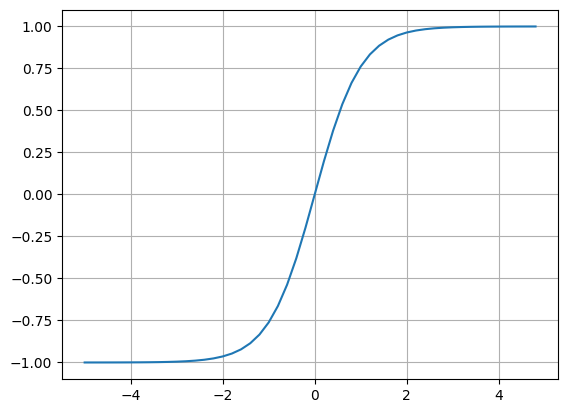

In [7]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [8]:
#inputs x1, x2

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' 
 

In [9]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 6.881373587019543),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = 2.0),
 Value(data = 3.0),
 Value(data = 6.0),
 Value(data = 6.0),
 Value(data = 12.881373587019542),
 Value(data = 0.9999999999870458)]

In [10]:
o.backward()

In [15]:
#o = tanh(n)
#do/dn = 1- o**2

In [29]:
a = Value(2.0)
b = Value(4.0)
a/b

Value(data = 0.5)

In [31]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data = -2.0)

In [34]:
#inputs x1, x2

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
# -----
e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o' 
o.backward()
 

In [35]:
import torch

In [38]:
x1 = torch.Tensor([2.0]).double()                      ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                      ; x2.requires_grad = True
w1 = torch.Tensor([3.0]).double()                      ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                      ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()      ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print("------")
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.9999999999870458
------
x2 2.5908386547089767e-11
w2 0.0
x1 7.77251596412693e-11
w1 5.1816773094179534e-11


In [132]:
import random
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        x = [Value(xi) if not isinstance(xi, Value) else xi for xi in x]
        act = sum((wi * xi for wi, xi in zip(self.w, x)), start=self.b)
        # act = act + self.b  # Add bias
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]
        

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    


In [133]:
x = [2.0,3.0,1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data = 0.6198207593851749)

In [134]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,-1.0],
    [1.0,1.0,-1.0]
]
ys = [1.0,-1.0,-1.0,1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data = 0.4895090309305206),
 Value(data = 0.8613780724738282),
 Value(data = 0.5196662194144565),
 Value(data = 0.6548319712269398)]

In [139]:
n.parameters()

[Value(data = -0.9039099324005222),
 Value(data = 0.6463152231102955),
 Value(data = -0.0867320798718838),
 Value(data = 0.36113477987866194),
 Value(data = -0.4464356040193669),
 Value(data = 0.9581404177356878),
 Value(data = 0.8870373089339272),
 Value(data = -0.34901277080760873),
 Value(data = 0.542311390861121),
 Value(data = 0.6541854087367531),
 Value(data = -0.7548175623413664),
 Value(data = -0.29816998933889804),
 Value(data = -0.047194855477267206),
 Value(data = 0.29866294410296734),
 Value(data = 0.4861406335881615),
 Value(data = 0.10472473715327446),
 Value(data = 0.6253698093433762),
 Value(data = 0.6086003348151865),
 Value(data = -0.9871845000434598),
 Value(data = -0.7907284471431699),
 Value(data = 0.7866482526475878),
 Value(data = -0.32311520508898917),
 Value(data = -0.15819916210890606),
 Value(data = 0.4714010430171447),
 Value(data = 0.04957513542334113),
 Value(data = 0.06611193569118967),
 Value(data = 0.8250901181173786),
 Value(data = -0.961110210757592),

In [140]:
len(n.parameters())

41

In [141]:
loss = sum((yout.data - ygt)**2 for ygt,yout in zip(ys,ypred))
loss

6.153855744704387

In [142]:
ypred = [n(x) for x in xs]
loss = sum(( (yout - Value(ygt))**2 for ygt, yout in zip(ys, ypred) ), start=Value(0))
loss

Value(data = 6.153855744704387)

In [143]:
n.layers[0].neurons[0].w[0].data

-0.9039099324005222

In [144]:
loss.backward()

In [145]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [146]:
n.layers[0].neurons[0].w[0].data

-0.9070964686139851

In [147]:
for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum(( (yout - Value(ygt))**2 for ygt, yout in zip(ys, ypred) ), start=Value(0))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0 
    loss.backward()

    # update
    for p in n.parameters():
        p.data -= 0.05 * p.grad

    print(k, loss)




0 Value(data = 6.031255264518452)
1 Value(data = 5.455605852920166)
2 Value(data = 4.819604765960377)
3 Value(data = 4.059688914889732)
4 Value(data = 3.376703772142877)
5 Value(data = 2.8856001850006243)
6 Value(data = 2.5147907654871275)
7 Value(data = 2.2288486112741275)
8 Value(data = 2.0127389564065874)
9 Value(data = 1.8447071429679625)
10 Value(data = 1.7043198413179437)
11 Value(data = 1.5781380833967464)
12 Value(data = 1.4592463390093342)
13 Value(data = 1.3448726521218832)
14 Value(data = 1.2344141162913695)
15 Value(data = 1.1282371298297211)
16 Value(data = 1.0270456813706605)
17 Value(data = 0.9315807675346277)
18 Value(data = 0.842476701397304)
19 Value(data = 0.7601918160815937)


In [128]:
import random
import math

class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label
        self._backward = lambda: None 

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        return self * (other**-1)

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t ** 2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()
        self.grad = 1.0
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()


class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        x = [Value(xi) if not isinstance(xi, Value) else xi for xi in x]
        act = sum((wi * xi for wi, xi in zip(self.w, x)), start=self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]


class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


# Training loop
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

n = MLP(3, [4, 4, 1])

for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum(((yout - ygt)**2 for ygt, yout in zip(ys, ypred)), start=Value(0))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0  # Zero out gradients before backward pass
    loss.backward()

    # update
    for p in n.parameters():
        # print(f"Before update - data: {p.data}, grad: {p.grad}")
        p.data -= 0.05 * p.grad
        # print(f"After update - data: {p.data}, grad: {p.grad}")

    print(f"Epoch {k}: Loss = {loss.data}")

Epoch 0: Loss = 6.721794104661164
Epoch 1: Loss = 5.811857546998258
Epoch 2: Loss = 4.482956140033954
Epoch 3: Loss = 3.927691814115329
Epoch 4: Loss = 3.6675686709575057
Epoch 5: Loss = 3.397207267935123
Epoch 6: Loss = 3.103593998026255
Epoch 7: Loss = 2.829299684962084
Epoch 8: Loss = 2.610109456886926
Epoch 9: Loss = 2.43912455500125
Epoch 10: Loss = 2.29266980347568
Epoch 11: Loss = 2.1529806732126264
Epoch 12: Loss = 2.0107967149218546
Epoch 13: Loss = 1.8635201677626234
Epoch 14: Loss = 1.713191087571865
Epoch 15: Loss = 1.564959792583603
Epoch 16: Loss = 1.4240498506169337
Epoch 17: Loss = 1.2943001805384222
Epoch 18: Loss = 1.1766529001852672
Epoch 19: Loss = 1.0710920653535334
